##TRABALHO SOBRE FASE - DSP 1

###ALUNA: ELISA ANES ROMERO


Vamos carregar o conjunto de dados do arquivo .mat, contendo sinais de radar e ruído, e realizar uma análise espectral desses sinais. O objetivo é visualizar a distribuição espectral do sinal útil e do ruído para avaliar a possibilidade de filtragem seletiva. Além disso, a análise do atraso de grupo também pode ser feita para verificar se a filtragem introduzirá distorções temporais.



dict_keys(['a', 'b', 'h', 'noise', 'pulse', 'x1', 'x2', 'pnd_1', 'pnd_2'])


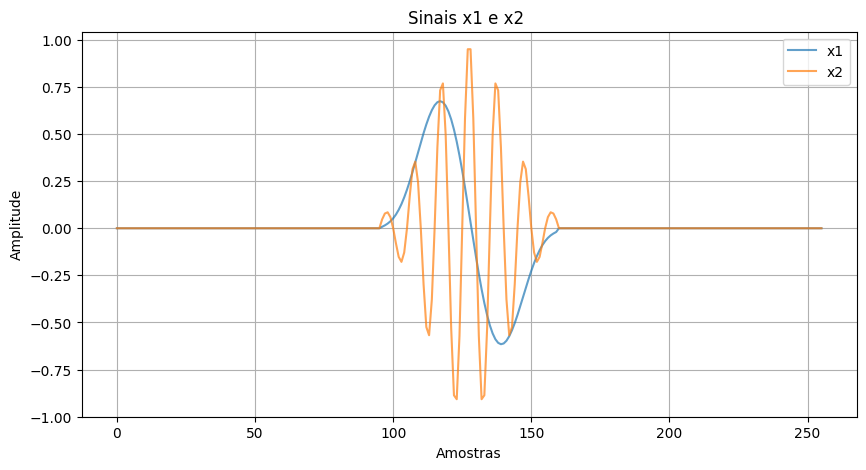

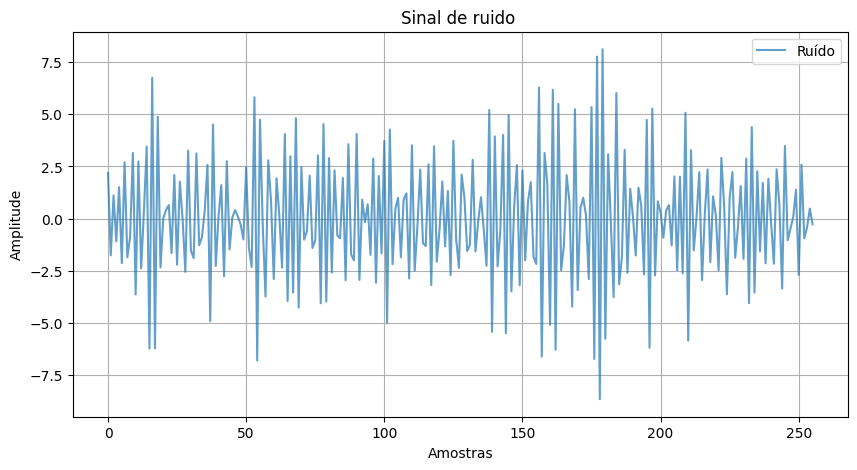

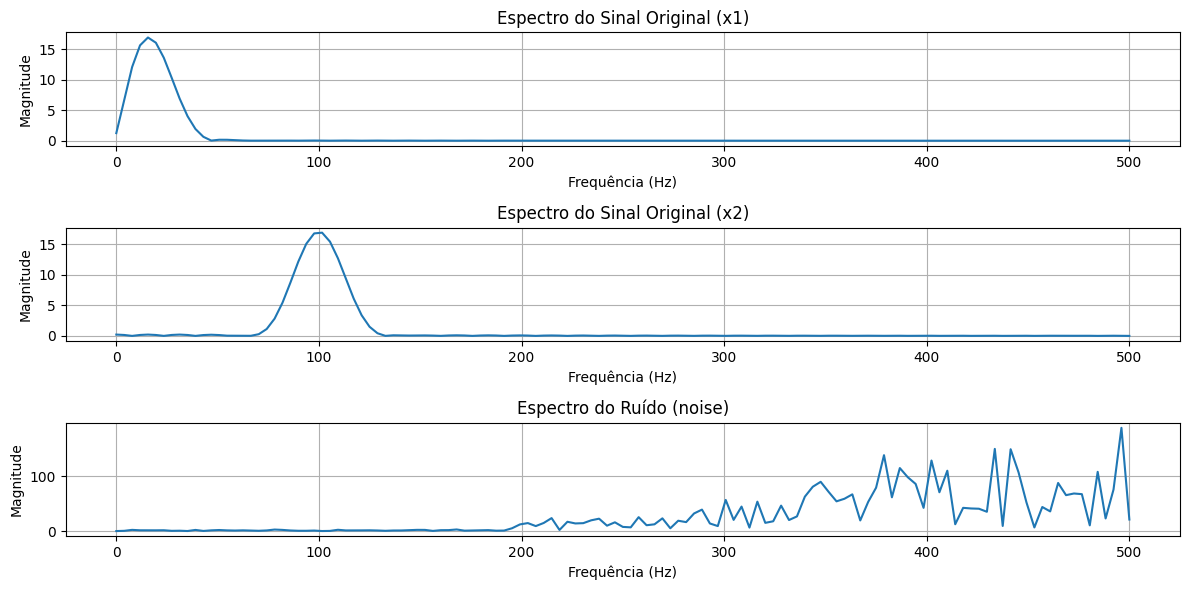

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import group_delay, freqz, lfilter
from scipy.signal import butter, lfilter


# Carregar dados do arquivo MAT (use o caminho correto)
from scipy.io import loadmat

# Carregar o arquivo .mat no Colab
file_path = "/content/gdeldata.mat"
data = loadmat(file_path)

# Verificando as variáveis carregadas
print(data.keys())

h = data['h'].flatten()  # Coeficientes FIR
b = data['b'].flatten()  # Numerador IIR
a = data['a'].flatten()  # Denominador IIR
x1 = data['x1'].flatten()  # Sinal x1(n)
x2 = data['x2'].flatten()
noise = data['noise'].flatten()  # Ruído

# Plotar os sinais x1 e x2
plt.figure(figsize=(10, 5))
plt.plot(x1, label='x1', alpha=0.7)
plt.plot(x2, label='x2', alpha=0.7)
plt.title('Sinais x1 e x2 ')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Plotar o sinal de ruído
plt.figure(figsize=(10, 5))
plt.plot(noise, label='Ruído', alpha=0.7)
plt.title('Sinal de ruido ')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

"""
Analisar o Sinal e o Ruído
O objetivo é observar as faixas de frequência ocupadas pelo
sinal x1 e pelo ruído noise.
Isso pode ser feito visualizando o espectro de frequência de ambos.

O espectro do sinal (x1) mostra que ele ocupa uma faixa
específica de frequências (faixa útil).
O espectro do ruído (noise) mostra que ele ocupa outra faixa,
normalmente fora da faixa útil do sinal.

"""

# Configurações
fs = 1000  # Frequência de amostragem

# Função para calcular o espectro de magnitude
def plot_spectrum(signal, fs, title):
    freq = np.fft.rfftfreq(len(signal), d=1/fs)  # Frequências positivas
    spectrum = np.abs(np.fft.rfft(signal))       # Espectro de magnitude
    plt.plot(freq, spectrum)
    plt.title(title)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()

# Plotar os espectros de x1 e noise
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plot_spectrum(x1, fs, 'Espectro do Sinal Original (x1)')

plt.subplot(3, 1, 2)
plot_spectrum(x2, fs, 'Espectro do Sinal Original (x2)')

plt.subplot(3, 1, 3)
plot_spectrum(noise, fs, 'Espectro do Ruído (noise)')

plt.tight_layout()
plt.show()


###########################################################################



Na primeira imagem, é possível visualizar os sinais x1 e x2, onde x1 representa o sinal original e x2 uma versão modificada. A comparação entre ambos permite identificar possíveis alterações na amplitude e forma do sinal devido à presença de ruído ou modificações no sistema.

Na segunda imagem, é apresentado o sinal de ruído, permitindo uma análise isolada do comportamento do ruído no domínio do tempo.

Na terceira imagem, são exibidos os espectros de magnitude dos sinais. O primeiro gráfico mostra o espectro do sinal x1, destacando a faixa de frequências que ele ocupa. Em seguida, o espectro do sinal x2 permite verificar eventuais modificações na distribuição espectral. Por fim, o espectro do ruído evidencia que sua magnitude se mantém relativamente baixa nas frequências mais baixas, mas começa a se intensificar a partir de 350 Hz

##Projetar um Filtro para Recuperar o Sinal:

Analisando o Espectro do sinal x1 e do ruído, é possível perceber que eles
ocupam faixas de frequência diferentes, pode-se projetar um filtro que rejeita
a faixa de frequência do ruído e permita a passagem somente do espectro do
sinal original x1.

O sinal x1 tem seu espectro de frequência abaixo de 60 Hz, enquanto o ruído tem
seu expectro acima de 150Hz, apartir dessa informação define-se que a topologia
do filtro será um passa baixas com frequência de corte em 60 Hz.

Além disso, diferentes ordens de filtro serão testadas para analisar a melhor configuração entre eficiência de filtragem e complexidade computacional.

[0.02785977 0.05571953 0.02785977] [ 1.         -1.47548044  0.58691951]


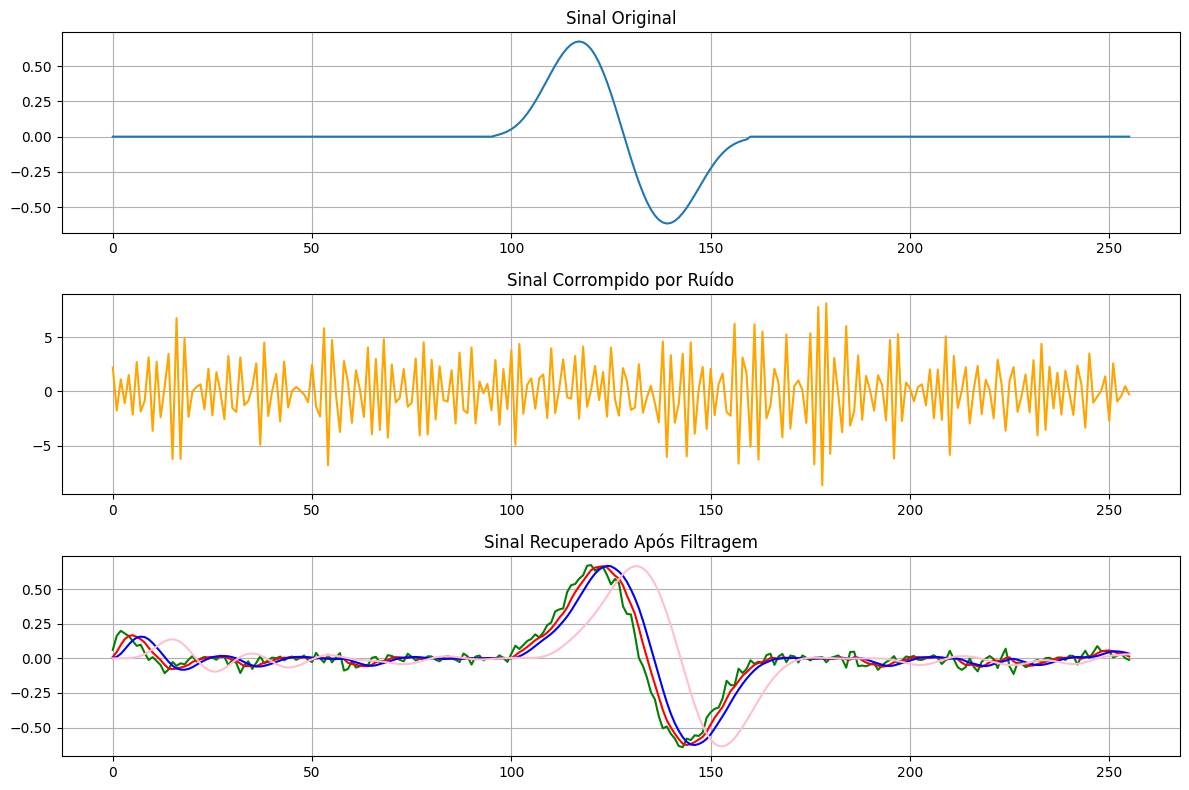

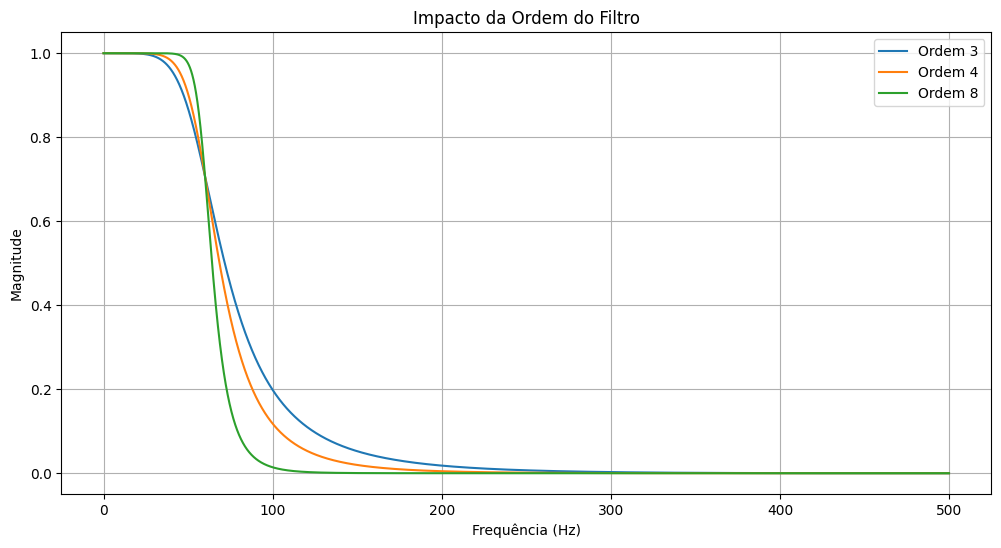

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import group_delay, freqz, lfilter
from scipy.signal import butter, lfilter

fs = 1000  # Frequência de amostragem

# Projetar um filtro passa-baixa Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    y = lfilter(b, a, data)
    return y

# Parâmetros do filtro
cutoff = 60.0  # Frequência de corte (ajuste conforme necessário)
order = 2

# Projetar o filtro
b, a = butter_lowpass(cutoff, fs, order)
print(b,a)

# Aplicar o filtro no sinal corrompido
x1_noisy = x1 + noise
x1_filtered = butter_lowpass_filter(x1_noisy, cutoff, fs, order)


cutoff = 60.0  # Frequência de corte
order = 3
b, a = butter_lowpass(cutoff, fs, order)
x1_filtered_1 = butter_lowpass_filter(x1_noisy, cutoff, fs, order)

cutoff = 60.0  # Frequência de corte
order = 4
b, a = butter_lowpass(cutoff, fs, order)
x1_filtered_2 = butter_lowpass_filter(x1_noisy, cutoff, fs, order)

cutoff = 60.0  # Frequência de corte
order = 8
b, a = butter_lowpass(cutoff, fs, order)
x1_filtered_3 = butter_lowpass_filter(x1_noisy, cutoff, fs, order)

# Plotar o sinal original, corrompido e filtrado
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x1, label='Sinal Original (x1)')
plt.title('Sinal Original')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(x1_noisy, label='Sinal Corrompido (x1 + noise)', color='orange')
plt.title('Sinal Corrompido por Ruído')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x1_filtered, label='Sinal Filtrado', color='green')
plt.plot(x1_filtered_1, label='Sinal Filtrado', color='red')
plt.plot(x1_filtered_2, label='Sinal Filtrado', color='blue')
plt.plot(x1_filtered_3, label='Sinal Filtrado', color='pink')

plt.title('Sinal Recuperado Após Filtragem')
plt.grid()

plt.tight_layout()
plt.show()

# Diferentes ordens
# Frequência de amostragem e corte
fs = 1000
cutoff = 60

# Testar diferentes ordens
orders = [3, 4, 8]

plt.figure(figsize=(12, 6))
for order in orders:
    b, a = butter(order, cutoff / (0.5 * fs), btype='low')
    w, h = freqz(b, a, worN=8000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label=f'Ordem {order}')

plt.title('Impacto da Ordem do Filtro')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.show()

# Fase em Filtros FIR e IIR



###Ordem do Filtro:

Após a análise das múltiplas ordens de filtro, pode-se escolher um filtro de
terceira ordem, pois é a menor ordem que filtra o sinal de forma toleravél.
A escolha da ordem é importante pois implica diretamente na capacidade
computacional e na velocidade de processamento do sinal.

##Fase em Filtros FIR e IIR

Os filtros FIR e IIR possuem características distintas que impactam sua escolha em diferentes aplicações. Os filtros FIR podem apresentar uma resposta ao impulso simétrica ou assimétrica. Quando simétrica, indicam fase linear, garantindo que todas as frequências sofram o mesmo atraso de grupo. Isso preserva a forma do sinal no tempo, evitando distorções temporais. O filtro FIR mantém a estrutura original do sinal, mas pode introduzir um atraso fixo. Além disso, para alcançar um bom desempenho de filtragem, ele geralmente requer um número maior de coeficientes, aumentando a complexidade computacional. Já o filtro IIR pode distorcer a forma do sinal devido à sua fase não linear, pois diferentes frequências sofrem atrasos distintos. No entanto, ele é mais eficiente em termos computacionais, pois sua saída depende das saídas passadas, permitindo atingir características de filtragem similares ao FIR com um menor número de coeficientes. Apesar dessa vantagem, os filtros IIR são mais suscetíveis a instabilidades e devem ser projetados com cuidado. Devido ao menor número de cálculos e menor consumo de memória, os filtros IIR são mais indicados para aplicações em tempo real e sistemas embarcados com recursos limitados, onde a eficiência computacional é um fator crítico.

Analises feitas no código:

. Resposta em frequência (magnitude e dB).

. Atraso de grupo, indicando distorções de fase.

. Resposta ao impulso do filtro FIR, verificando sua simetria.

. Filtragem de um sinal real (x1) usando ambos os filtros e comparando os sinais de saída.


dict_keys(['a', 'b', 'h', 'noise', 'pulse', 'x1', 'x2', 'pnd_1', 'pnd_2'])
Resposta filtro FIR h: [ 5.48561088e-03 -1.18707608e-02 -1.25763647e-02 -9.82643899e-03
 -3.12545625e-04  1.29790145e-02  2.21276737e-02  1.87995908e-02
  1.29881329e-04 -2.69694428e-02 -4.67727551e-02 -4.13740753e-02
 -1.44072790e-04  7.26328792e-02  1.56986506e-01  2.24423648e-01
  2.50152132e-01  2.24423648e-01  1.56986506e-01  7.26328792e-02
 -1.44072790e-04 -4.13740753e-02 -4.67727551e-02 -2.69694428e-02
  1.29881329e-04  1.87995908e-02  2.21276737e-02  1.29790145e-02
 -3.12545625e-04 -9.82643899e-03 -1.25763647e-02 -1.18707608e-02
  5.48561088e-03]
Coeficientes numerador filtro IIR b: [ 0.03185458 -0.16633254  0.41213329 -0.65925388  0.76812882 -0.67586739
  0.4357336  -0.18381637  0.03747774]
Coeficientes denominador filtro IIR a: [  1.          -6.61518835  19.58687788 -33.90036844  37.50349153
 -27.14624679  12.55003739  -3.38736077   0.4088154 ]


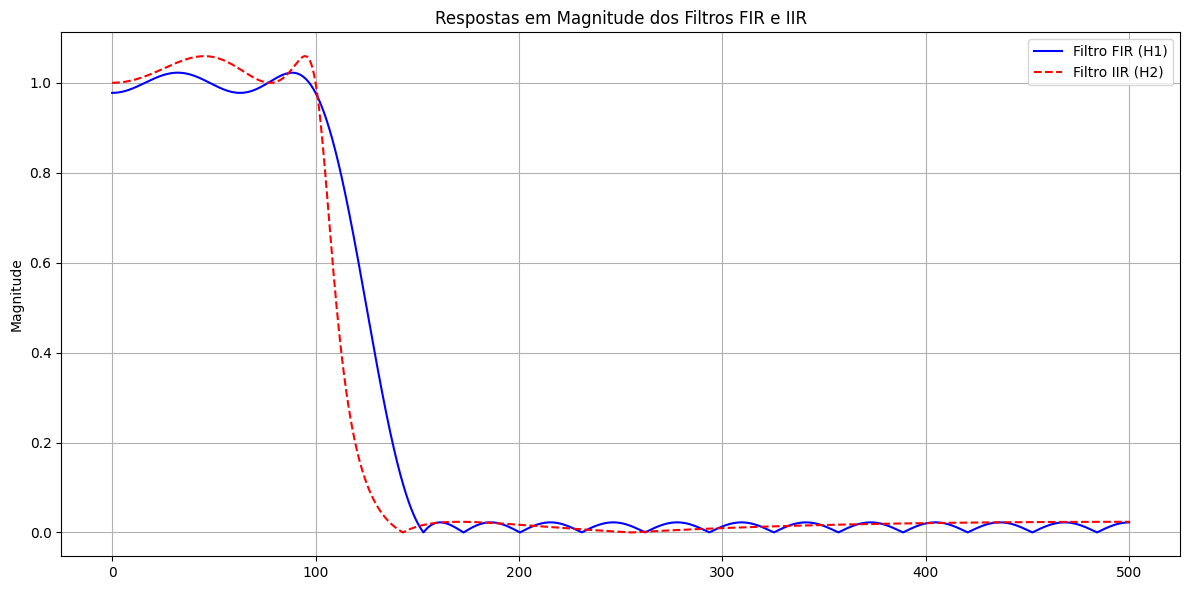

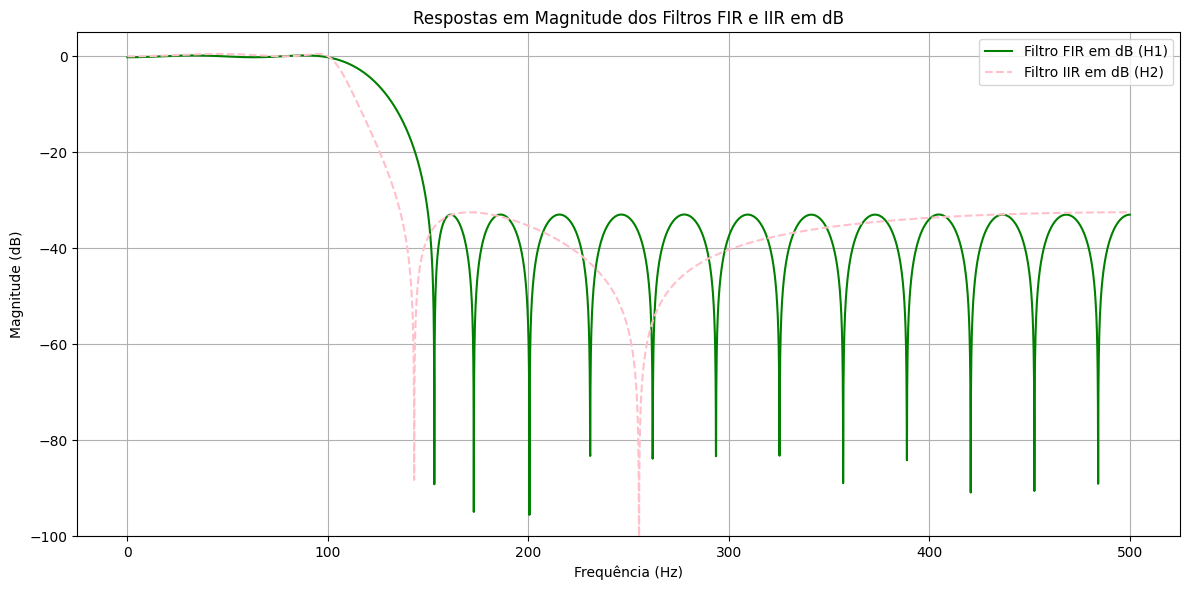

A resposta ao impulso do filtro FIR é simétrica? Sim


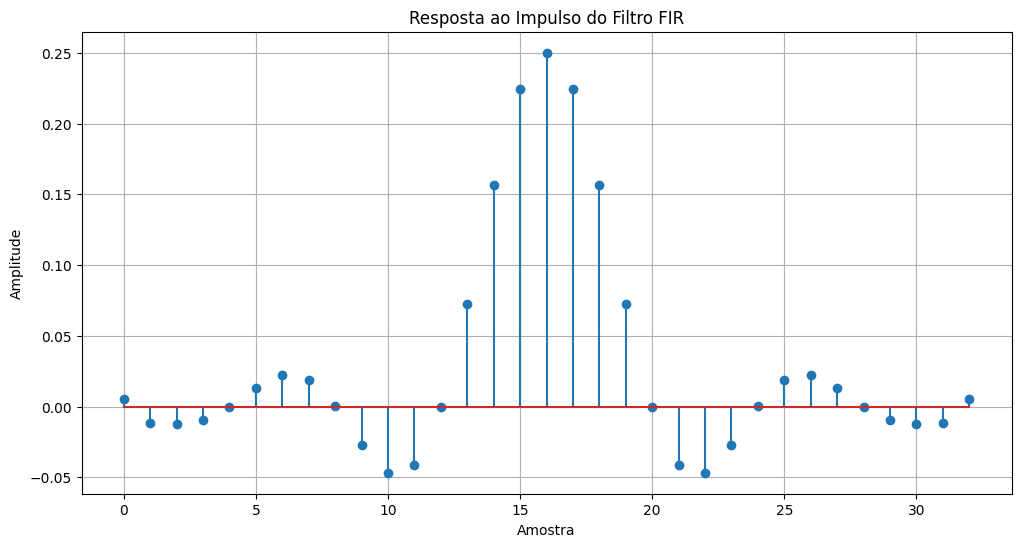

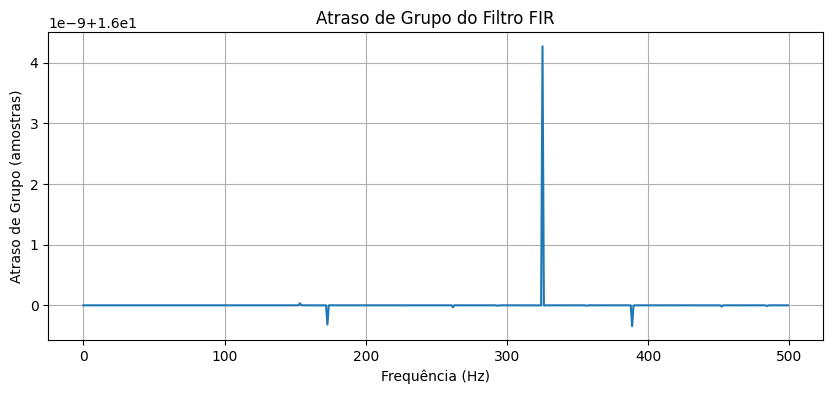

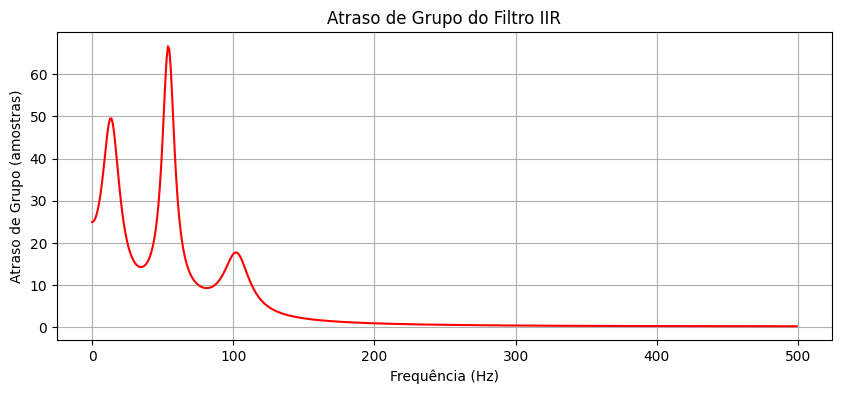

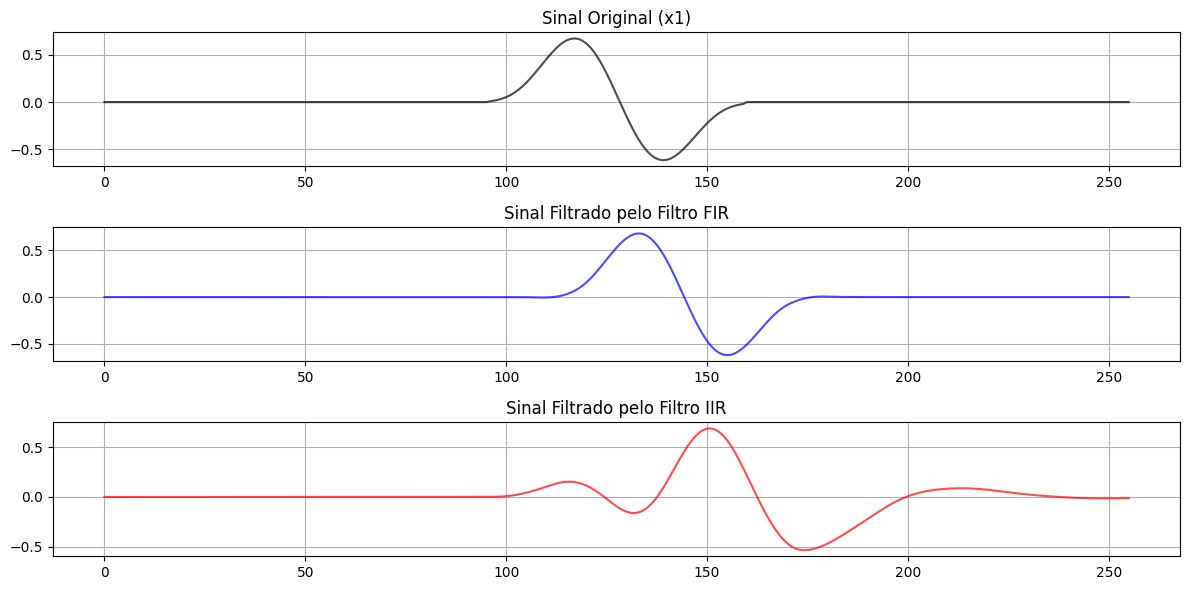

'\nFiltro FIR:\nPreserva a forma do sinal original devido à fase linear.\nPode introduzir atraso, mas o sinal permanece inalterado em termos de forma.\n\nFiltro IIR:\nPode distorcer o sinal devido à fase não linear (diferentes frequências\nsão atrasadas de forma desigual).\nÉ mais eficiente em termos de computação, pois a saída atual depende das saídas\npassadas, o IIR pode atingir características de filtragem similares ao FIR com\nmenos coeficientes , mas pode ser inadequado para sinais que exigem preservação\nde forma.\n\nAplicação em tempo real:\nDevido ao menor número de cálculos, os filtros IIR são mais adequados para\naplicações de tempo real ou sistemas embarcados com recursos limitados.\n\n'

In [13]:
"""
Checagem de gráficos de magnitude dos filtros FIR e IIR:

Respostas de magnitude plotadas no mesmo gráfico.
"""


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import group_delay, freqz, lfilter
from scipy.signal import butter, lfilter
from scipy.signal import freqz

# Carregar dados do arquivo MAT (use o caminho correto)
from scipy.io import loadmat

# Carregar o arquivo .mat no Colab
file_path = "/content/gdeldata.mat"
data = loadmat(file_path)

# Verificando as variáveis carregadas
print(data.keys())

h = data['h'].flatten()  # Coeficientes FIR
b = data['b'].flatten()  # Numerador IIR
a = data['a'].flatten()  # Denominador IIR
x1 = data['x1'].flatten()  # Sinal x1(n)
x2 = data['x2'].flatten()
noise = data['noise'].flatten()  # Ruído

print("Resposta filtro FIR h:", h)
print("Coeficientes numerador filtro IIR b:", b)
print("Coeficientes denominador filtro IIR a:", a)

# Calcular a resposta em frequência dos filtros
fs = 1000  # Frequência de amostragem (ajuste conforme necessário)
w_fir, h_fir = freqz(h, worN=8000, fs=fs)  # FIR
w_iir, h_iir = freqz(b, a, worN=8000, fs=fs)  # IIR

# Plotar as respostas em magnitude
plt.figure(figsize=(12, 6))
plt.plot(w_fir, abs(h_fir), label='Filtro FIR (H1)', color='blue')
plt.plot(w_iir, abs(h_iir), label='Filtro IIR (H2)', color='red', linestyle='--')
plt.ylabel('Magnitude')
plt.title('Respostas em Magnitude dos Filtros FIR e IIR')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Respostas em Magnitude dos Filtros FIR e IIR em dB')
plt.ylim([-100, 5])  # Limitar entre -100 dB e 5 dB
plt.plot(w_fir, 20 * np.log10(abs(h_fir)), label='Filtro FIR em dB (H1)', color='green')
plt.plot(w_iir, 20 * np.log10(abs(h_iir)), label='Filtro IIR em dB (H2)', color='pink', linestyle='--')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


from scipy.signal import group_delay, lfilter

"""
Um filtro FIR apresenta uma resposta ao impulso que pode ser simétrica ou
assimétrica. Se for simétrica, indica que o filtro tem fase linear, o que
significa que todas as frequências sofrerão o mesmo atraso de grupo,
preservando a forma do sinal no tempo.
"""

# Verificar a simetria do filtro FIR
is_symmetric = np.allclose(h, h[::-1])
print(f'A resposta ao impulso do filtro FIR é simétrica? {"Sim" if is_symmetric else "Não"}')

# Plotar a resposta ao impulso do filtro FIR
plt.figure(figsize=(12, 6))
plt.stem(h)
plt.title('Resposta ao Impulso do Filtro FIR')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Calcular atraso de grupo do filtro FIR

"""
O atraso de grupo do filtro FIR deve ser constante em todas as frequências (fase linear).
"""

w_fir, gd_fir = group_delay((h, [1]), fs=fs)

# Plotar atraso de grupo
plt.figure(figsize=(10, 4))
plt.plot(w_fir, gd_fir, label='FIR')
plt.title('Atraso de Grupo do Filtro FIR')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Atraso de Grupo (amostras)')
plt.grid()
plt.show()

# Calcular atraso de grupo do filtro IIR

"""
O atraso de grupo do filtro IIR pode variar com a frequência, indicando fase não linear.
"""
w_iir, gd_iir = group_delay((b, a), fs=fs)

# Plotar atraso de grupo
plt.figure(figsize=(10, 4))
plt.plot(w_iir, gd_iir, label='IIR', color='red')
plt.title('Atraso de Grupo do Filtro IIR')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Atraso de Grupo (amostras)')
plt.grid()
plt.show()


# Filtrar o sinal x1(n) com os filtros FIR e IIR

"""
Filtraremos o sinal
x1(n) usando os filtros FIR e IIR e compararemos os sinais de saída.
"""
x1_fir_filtered = lfilter(h, [1], x1)  # Filtro FIR
x1_iir_filtered = lfilter(b, a, x1)   # Filtro IIR

# Plotar os sinais filtrados
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(x1, label='Sinal Original (x1)', color='black', alpha=0.7)
plt.title('Sinal Original (x1)')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(x1_fir_filtered, label='Filtrado FIR', color='blue', alpha=0.7)
plt.title('Sinal Filtrado pelo Filtro FIR')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x1_iir_filtered, label='Filtrado IIR', color='red', alpha=0.7)
plt.title('Sinal Filtrado pelo Filtro IIR')
plt.grid()

plt.tight_layout()
plt.show()

"""
Filtro FIR:
Preserva a forma do sinal original devido à fase linear.
Pode introduzir atraso, mas o sinal permanece inalterado em termos de forma.

Filtro IIR:
Pode distorcer o sinal devido à fase não linear (diferentes frequências
são atrasadas de forma desigual).
É mais eficiente em termos de computação, pois a saída atual depende das saídas
passadas, o IIR pode atingir características de filtragem similares ao FIR com
menos coeficientes , mas pode ser inadequado para sinais que exigem preservação
de forma.

Aplicação em tempo real:
Devido ao menor número de cálculos, os filtros IIR são mais adequados para
aplicações de tempo real ou sistemas embarcados com recursos limitados.

"""



###Análise dos gráficos gerados:

No primeiro gráfico, observa-se que ambos os filtros atenuam as frequências acima da banda de passagem, mas o filtro IIR apresenta uma transição mais rápida entre a banda de passagem e a banda de rejeição, enquanto o FIR tem uma transição mais suave. Isso indica que o filtro IIR pode oferecer um desempenho semelhante ao FIR com um número menor de coeficientes.

No segundo gráfico, a atenuação dos filtros é analisada em escala logarítmica. O filtro IIR tem uma atenuação mais abrupta nas frequências acima do corte, enquanto o FIR apresenta ondulações maiores na banda de rejeição. Isso pode indicar que o filtro FIR tem uma menor eficiência na atenuação fora da banda desejada.

O terceiro gráfico mostra a resposta ao impulso do filtro FIR, evidenciando sua simetria. Isso confirma que o filtro FIR tem fase linear, o que significa que todas as frequências sofrem o mesmo atraso de grupo, preservando a forma do sinal.

O quarto e o quinto gráficos mostram o atraso de grupo dos filtros FIR e IIR, respectivamente. O FIR apresenta um atraso de grupo praticamente constante, o que confirma que ele preserva a forma do sinal ao longo de todas as frequências. Já o IIR tem um atraso de grupo variável, indicando que diferentes componentes do sinal podem sofrer atrasos diferentes, levando a uma distorção na forma do sinal.

No último conjunto de gráficos, o sinal original é comparado com as versões filtradas pelos filtros FIR e IIR. O sinal filtrado pelo FIR mantém a forma original, mas apresenta um atraso fixo. Já o sinal filtrado pelo IIR sofre uma distorção perceptível devido ao atraso de grupo não uniforme.

###Conclusão:

A escolha do melhor filtro depende da aplicação. Se a preservação da forma do sinal for um critério essencial, o filtro FIR é a melhor opção, pois tem fase linear e mantém a integridade do sinal. No entanto, se a eficiência computacional for mais importante e um leve comprometimento na forma do sinal for aceitável, o filtro IIR pode ser mais adequado, pois requer menos coeficientes para atingir um desempenho semelhante.


dict_keys(['a', 'b', 'h', 'noise', 'pulse', 'x1', 'x2', 'pnd_1', 'pnd_2'])


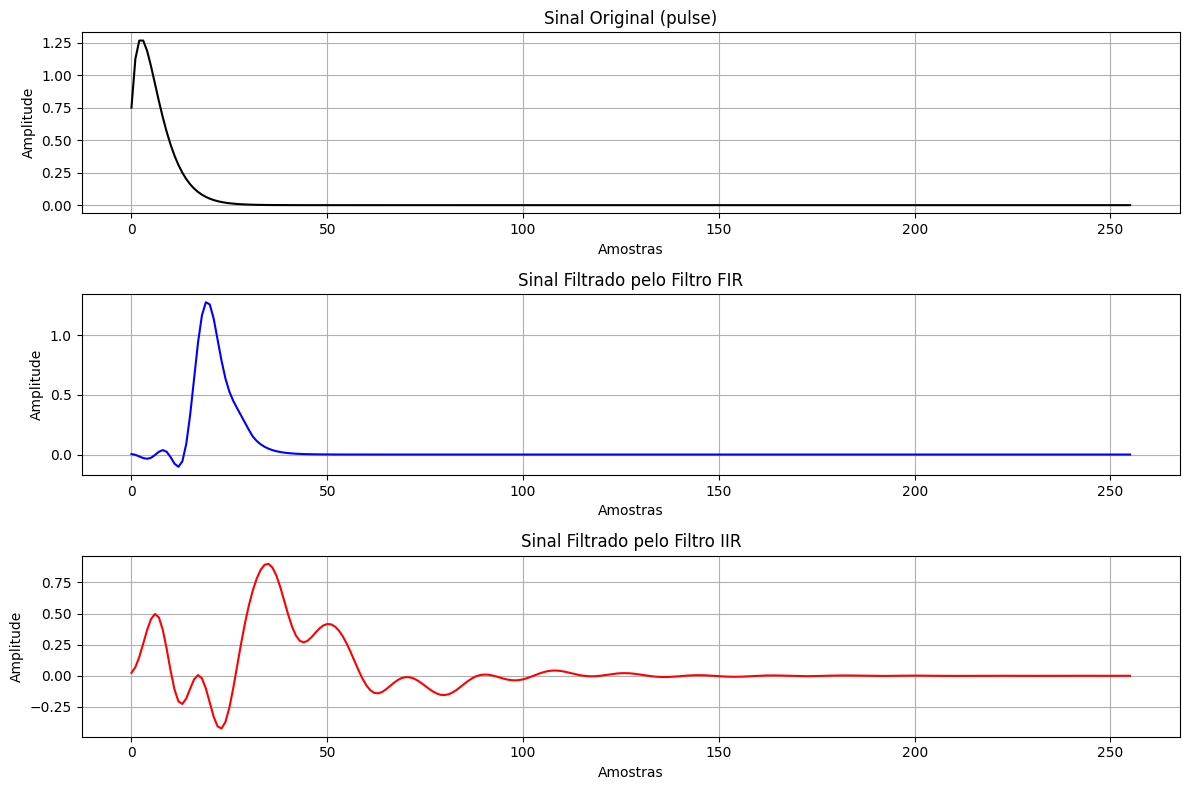

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import group_delay, freqz, lfilter
from scipy.signal import butter, lfilter
from scipy.signal import freqz

# Carregar dados do arquivo MAT (use o caminho correto)
from scipy.io import loadmat

# Carregar o arquivo .mat no Colab
file_path = "/content/gdeldata.mat"
data = loadmat(file_path)

# Verificando as variáveis carregadas
print(data.keys())

pulse = data['pulse'].flatten()
h = data['h'].flatten()  # Coeficientes FIR
b = data['b'].flatten()  # Numerador IIR
a = data['a'].flatten()  # Denominador IIR

# Filtrar o sinal com o filtro FIR
pulse_fir_filtered = lfilter(h, [1], pulse)

# Filtrar o sinal com o filtro IIR
pulse_iir_filtered = lfilter(b, a, pulse)

# Plotar os sinais
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(pulse, label='Sinal Original (pulse)', color='black')
plt.title('Sinal Original (pulse)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pulse_fir_filtered, label='Filtrado pelo FIR', color='blue')
plt.title('Sinal Filtrado pelo Filtro FIR')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(pulse_iir_filtered, label='Filtrado pelo IIR', color='red')
plt.title('Sinal Filtrado pelo Filtro IIR')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

##Distorção de pulso:

O filtro FIR preserva a forma do pulso, pois possui fase linear, garantindo que todas as frequências sofram o mesmo atraso. Como resultado, há apenas um deslocamento no tempo, mas sem deformação na amplitude do pulso.

O filtro IIR introduz distorção significativa, pois apresenta fase não linear, onde diferentes frequências sofrem atrasos distintos. Esse efeito causa espalhamento temporal e deformação da forma do pulso.
A realimentação do filtro IIR amplifica esse efeito, resultando em um sinal filtrado com variações indesejadas na amplitude e possíveis artefatos.


Atraso estimado com filtro FIR: 27 amostras
Atraso estimado com filtro IIR: 41 amostras


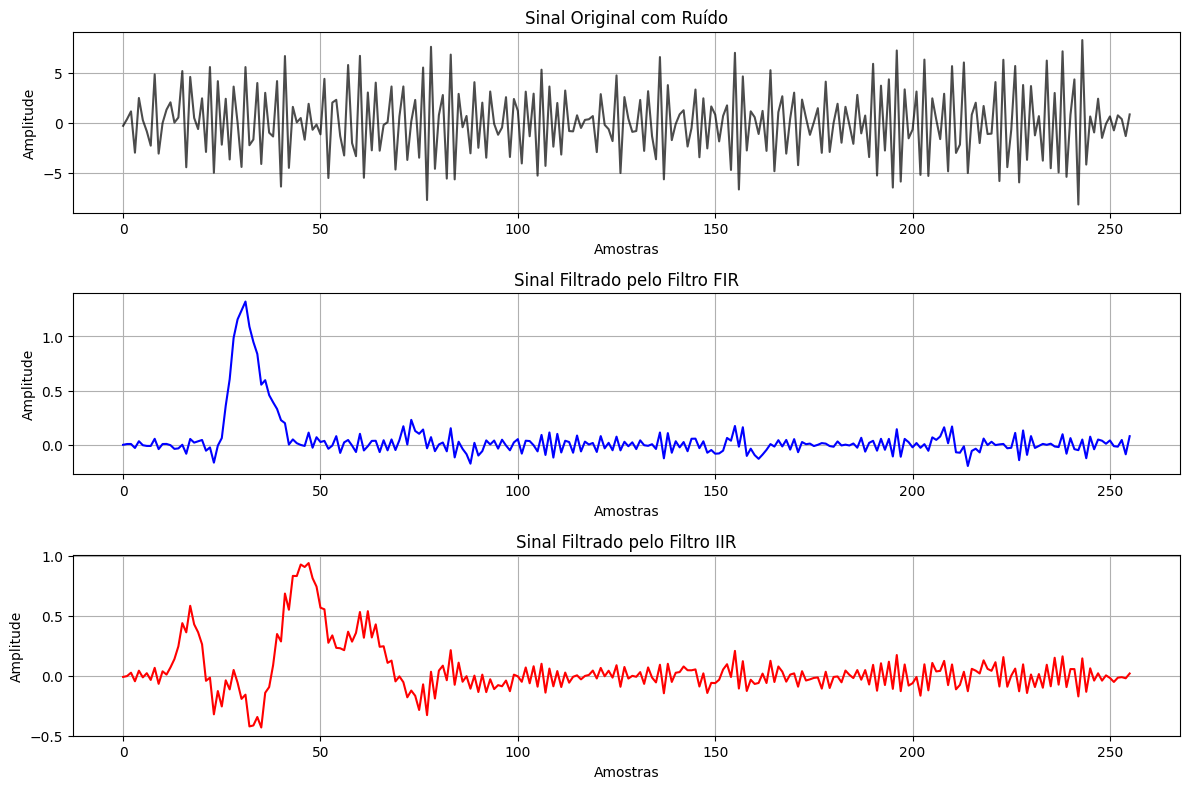

In [15]:
"""
Remoção de Ruído de um Pulso para estimar atraso
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, correlate

# Sinal de radar detectado com ruído (pnd_1)
pnd_1 = data['pnd_1'].flatten()

# Filtrar o sinal com o filtro FIR
pnd_1_fir = lfilter(h, [1], pnd_1)

# Filtrar o sinal com o filtro IIR
pnd_1_iir = lfilter(b, a, pnd_1)

# Estimar o atraso comparando com o sinal original (pulse)
pulse = data['pulse'].flatten()  # Sinal original

# Calcular correlações cruzadas
corr_fir = correlate(pnd_1_fir, pulse, mode='full')
corr_iir = correlate(pnd_1_iir, pulse, mode='full')

# Encontrar os índices dos picos
delay_fir = np.argmax(corr_fir) - (len(pulse) - 1)
delay_iir = np.argmax(corr_iir) - (len(pulse) - 1)

# Imprimir atrasos estimados
print(f"Atraso estimado com filtro FIR: {delay_fir} amostras")
print(f"Atraso estimado com filtro IIR: {delay_iir} amostras")

# Plotar os sinais filtrados e o original
plt.figure(figsize=(12, 8))

# Sinal original com ruído
plt.subplot(3, 1, 1)
plt.plot(pnd_1, label='Sinal Original com Ruído (pnd_1)', color='black', alpha=0.7)
plt.title('Sinal Original com Ruído')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid()

# Sinal filtrado pelo FIR
plt.subplot(3, 1, 2)
plt.plot(pnd_1_fir, label='Filtrado pelo FIR', color='blue')
plt.title('Sinal Filtrado pelo Filtro FIR')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid()

# Sinal filtrado pelo IIR
plt.subplot(3, 1, 3)
plt.plot(pnd_1_iir, label='Filtrado pelo IIR', color='red')
plt.title('Sinal Filtrado pelo Filtro IIR')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()



##Análise dos Resultados:

A análise dos sinais filtrados revela que o filtro FIR foi mais eficiente na remoção do ruído, preservando melhor a forma do pulso original. No gráfico do sinal filtrado pelo FIR, o pulso é claramente distinguível e menos afetado por oscilações indesejadas. Já o filtro IIR, apesar de reduzir parte do ruído, manteve oscilações significativas no sinal, tornando a identificação do pulso mais difícil. Essa diferença ocorre devido à característica de fase linear do FIR, que garante que todas as frequências do sinal sofram o mesmo atraso, enquanto o IIR pode introduzir variações temporais em diferentes componentes do espectro.

A estimativa do atraso revelou que o filtro FIR registrou um atraso de 27 amostras, enquanto o IIR apresentou um atraso de 41 amostras. Esse desvio no filtro IIR indica que a não linearidade de fase compromete a precisão da detecção do tempo de chegada do pulso. Como diferentes frequências são atrasadas de maneiras distintas no IIR, o pulso original sofre um espalhamento temporal, dificultando a exata localização do pico da correlação cruzada. Em contrapartida, o FIR mantém a estrutura do pulso mais intacta, resultando em uma estimativa de atraso mais confiável.

A análise do sinal filtrado pelo IIR também demonstra que o efeito de realimentação do filtro contribui para a distorção do pulso, tornando sua forma menos definida. Esse efeito pode ser problemático em aplicações como processamento de sinais de radar, onde a precisão na medição do tempo de chegada do eco é fundamental. O espalhamento do pulso pelo IIR pode levar a erros na determinação da posição e da distância do alvo, comprometendo a confiabilidade do sistema.

Diante desses resultados, o filtro FIR é a melhor escolha para essa aplicação, pois garante uma melhor preservação da forma do pulso e proporciona uma estimativa de atraso mais precisa. O filtro IIR, apesar de ser mais eficiente em termos computacionais, introduz um erro maior na estimativa do tempo de chegada do sinal devido à sua fase não linear. Portanto, para aplicações onde a exatidão na determinação do atraso é essencial, o uso do FIR se mostra mais adequado.